In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
crypto_data = pd.read_csv('crypto_data.csv')
crypto_data

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [6]:
trading_df = crypto_data.loc[crypto_data['IsTrading'] == True]
trading_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [7]:
drop_df = trading_df.dropna(axis=0, how='any')
drop_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [8]:
mined_coins = drop_df.loc[drop_df['TotalCoinsMined'] > 0]
mined_coins

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [15]:
numbers = pd.to_numeric(mined_coins['TotalCoinSupply'].copy())
converted_df = mined_coins.drop('TotalCoinSupply', axis=1)
converted_df['TotalCoinSupply'] = numbers
converted_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,4.200000e+01
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,5.320000e+08
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,3.141593e+11
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,2.100000e+07
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2.000000e+09
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,2.500000e+08
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1.400223e+09
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,2.100000e+07


In [20]:
replace_df = converted_df[['Unnamed: 0', 'CoinName']]
replace_df2 = converted_df.drop(['Unnamed: 0', 'CoinName'], axis=1)
new_df = pd.get_dummies(values_df)
new_df

,IsTrading,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,True,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,True,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,True,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,True,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,True,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,True,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,True,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,True,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,True,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
inertia = []
k = list(range(1, 11))
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(new_df)
    inertia.append(km.inertia_)
elbow = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow)
elbow_df

C:\Users\thoma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,3.542739e+24
1,2,1.061346e+24
2,3,6.224534e+23
3,4,2.450600e+23
4,5,1.284591e+23
5,6,7.859803e+22
6,7,5.562825e+22
7,8,4.056900e+22
8,9,2.972836e+22
9,10,2.174527e+22


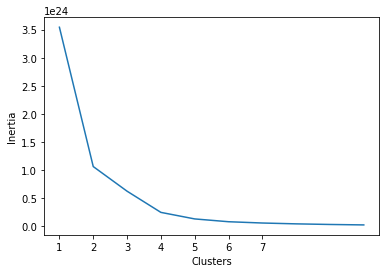

In [32]:
plt.plot(elbow['k'], elbow['inertia'])
plt.xticks(range(1,8))
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()